In [2]:
!pip install pyspark

BAGIAN C

In [4]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder.appName("Data Preprocessing").getOrCreate()

# Memuat data CSV
file_path = "/content/call_of_duty_reviews_50000.csv"
data_spark = spark.read.csv(file_path, header=True, inferSchema=True)

# Menampilkan struktur data
data_spark.printSchema()

# Menampilkan sampel data
data_spark.show(100, truncate=False)

root
 |-- userName: string (nullable = true)
 |-- content: string (nullable = true)
 |-- score: integer (nullable = true)

+--------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|userName|content                                                                                                                                                                                                                                                                                                                                                      

In [5]:
# Mengganti nama kolom agar lebih deskriptif
data_spark = data_spark.withColumnRenamed("userName", "User_Name") \
                       .withColumnRenamed("content", "Review_Content") \
                       .withColumnRenamed("score", "Review_Score")

# Menampilkan data setelah penggantian nama kolom
data_spark.show(100, truncate=False)

+---------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|User_Name|Review_Content                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [6]:
# Memeriksa jumlah nilai null di setiap kolom
null_counts = data_spark.select([data_spark[col].isNull().alias(col) for col in data_spark.columns])
null_counts.show()


+---------+--------------+------------+
|User_Name|Review_Content|Review_Score|
+---------+--------------+------------+
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
|    false|         false|       false|
+---------+--------------+------------+
only showing top 20 rows



In [7]:
from pyspark.sql.types import IntegerType

# Mengubah tipe data kolom Review_Score menjadi Integer
data_spark = data_spark.withColumn("Review_Score", data_spark["Review_Score"].cast(IntegerType()))

# Menampilkan struktur data setelah pengubahan tipe
data_spark.printSchema()


root
 |-- User_Name: string (nullable = true)
 |-- Review_Content: string (nullable = true)
 |-- Review_Score: integer (nullable = true)



In [8]:
# Menampilkan statistik deskriptif untuk kolom numerik
data_spark.describe().show()


+-------+---------+--------------------+-----------------+
|summary|User_Name|      Review_Content|     Review_Score|
+-------+---------+--------------------+-----------------+
|  count|    50000|               50000|            50000|
|   mean|     NULL|                NULL|          3.77156|
| stddev|     NULL|                NULL|1.675706217159364|
|    min| User1000|"Past few days I'...|                1|
|    max| User9999|                  ♥️|                5|
+-------+---------+--------------------+-----------------+



In [9]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Menggabungkan kolom numerik menjadi satu vektor
numeric_columns = ["Review_Score"]
assembler = VectorAssembler(inputCols=numeric_columns, outputCol="features")
vector_df = assembler.transform(data_spark)

# Menghitung matriks korelasi
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]

# Menampilkan matriks korelasi
print("Matriks Korelasi:\n", correlation_matrix.toArray())


Matriks Korelasi:
 [[1.]]


In [10]:
# Menyimpan data hasil preprocessing ke file CSV
output_path = "path_to_output/preprocessed_data.csv"
data_spark.write.csv(output_path, header=True)


BAGIAN D

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Konversi DataFrame PySpark ke Pandas untuk memudahkan visualisasi
data_pd = data_spark.toPandas()


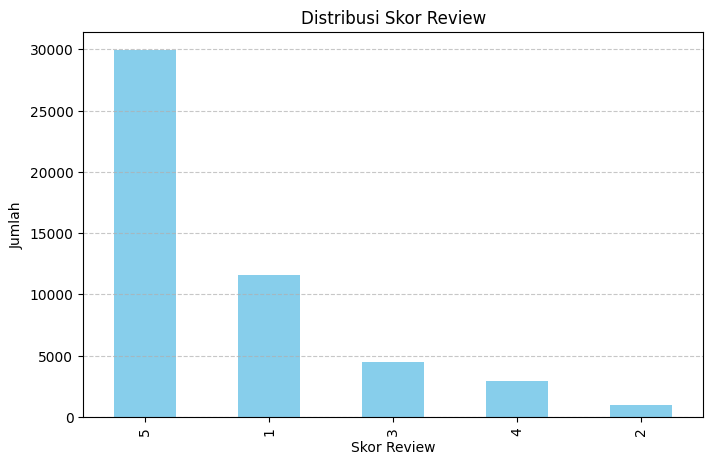

In [12]:
# Membuat bar chart untuk distribusi skor review
score_counts = data_pd['Review_Score'].value_counts()

plt.figure(figsize=(8, 5))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Skor Review')
plt.xlabel('Skor Review')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


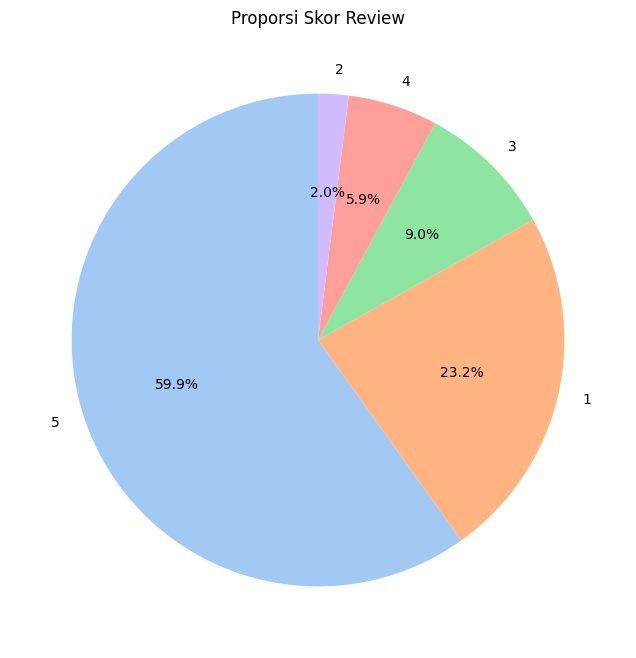

In [13]:
# Membuat pie chart untuk proporsi skor review
plt.figure(figsize=(8, 8))
score_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proporsi Skor Review')
plt.ylabel('')  # Menghilangkan label sumbu Y
plt.show()


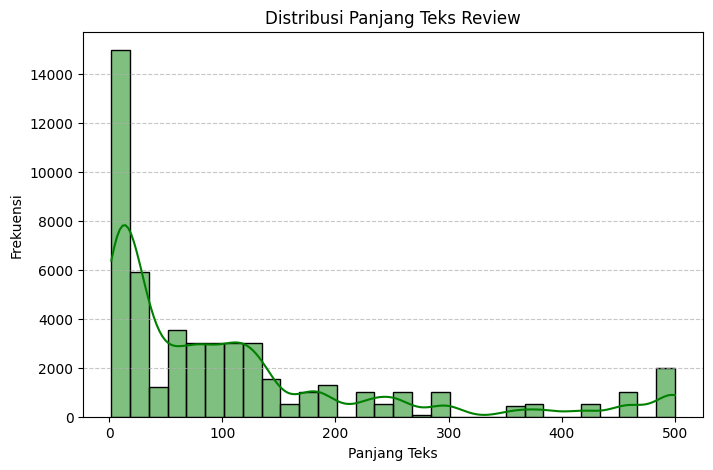

In [14]:
# Menambahkan kolom panjang teks review
data_pd['Review_Length'] = data_pd['Review_Content'].apply(len)

# Membuat histogram untuk panjang teks review
plt.figure(figsize=(8, 5))
sns.histplot(data=data_pd, x='Review_Length', bins=30, kde=True, color='green')
plt.title('Distribusi Panjang Teks Review')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


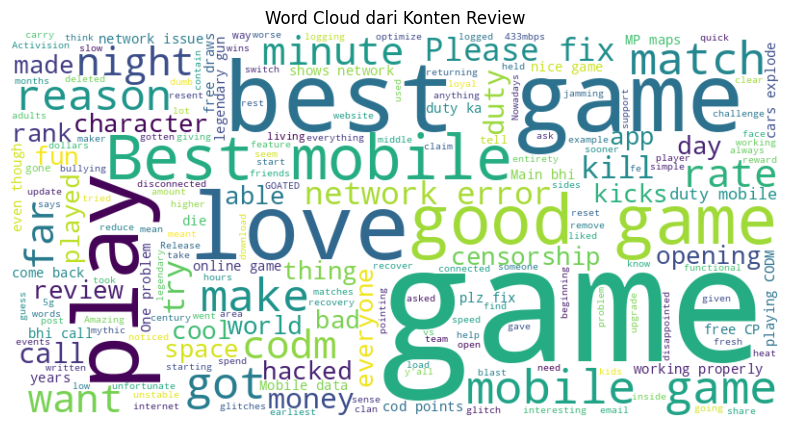

In [15]:
from wordcloud import WordCloud

# Menggabungkan semua teks review
text = " ".join(review for review in data_pd['Review_Content'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Konten Review')
plt.show()


BAGIAN E

ALASAN MEMILIH

1. Review_Score
- Alasan : kolom ini merupakan skor ulasan yang di berikan oleh pengguna dan merupakan target utama dalam banyak kasus analisis sentimen atau evaluasi kualitas produk
- dapat menampilkan tingkat kepuasan pengguna terhadap produk
- karena sangat penting dalam pembuatan game tentang kepuasan pelanggan dan prediksi selanjutnya apa yang harus di lakukan berdasarkan skor review

2. Review_Content
- karena ini berisikan penggalaman bermain pengguna melalui teks
- analis teks sentimen atau identifikasi tema utama dapat dilakukan dengan menggunakan data ini
- karena membantu memahami perasan pengguna dan untuk menyelesaikan masalah analisis sentimen dan tema review
- ini juga bisa digunakan untuk membangun model machine learning berbasis teks seperti NLP ( natural language processing )

3. review_Lenght
- Panjang teks ulasan bisa mencerminkan tingkat keterlibatan pengguna. Ulasan panjang cenderung lebih rinci dan bisa memberikan insight lebih mendalam dibandingkan ulasan pendek.
- ini juga berguna untuk analisis tambahan seperti memahami hubungan antara panjang teks dan skor ulasan

4. User_Name
-  ini bisa gunakan untuk melihat pola prilaku pengguna tertentu seperti pengguna yang memberikan ulasan yang sering atau spam
- karena dapat digunakan untuk segmentasi pengguna seperti mencari pengguna aktif yang sering memberikan ulasan baik untuk pengembangan game atau hanya gabut dan dapat mendekteksi pola pengguna dengan bias tertentu


NOMOR 2 PENGEMBANGAN MODEL MACHINE LEARNING

BAGIAN A

In [17]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, StringIndexer
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import when

# Inisialisasi Spark
spark = SparkSession.builder.appName("ML_Models").getOrCreate()

# Mengonversi kolom `Review_Content` ke fitur teks, dan `Review_Score` menjadi label
data = data_spark.select("Review_Content", "Review_Score")

# Mengubah `Review_Score` menjadi label numerik (0 atau 1)
data = data.filter(data.Review_Content.isNotNull() & data.Review_Score.isNotNull())
data = data.withColumn("label", when(data["Review_Score"] >= 4, 1).otherwise(0))


# Tokenisasi teks
tokenizer = Tokenizer(inputCol="Review_Content", outputCol="words")
data = tokenizer.transform(data)

# Fitur TF-IDF
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=10000)
idf = IDF(inputCol="rawFeatures", outputCol="features")
pipeline_tf = Pipeline(stages=[hashingTF, idf])
data = pipeline_tf.fit(data).transform(data)

# Memisahkan data latih dan data uji
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)


rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)



In [ ]:
gbt = GBTClassifier(featuresCol="features", labelCol="label", maxIter=50)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

In [18]:
lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=50)
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)


In [19]:
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)


In [20]:
# Evaluator untuk AUC
auc_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")

# Evaluator untuk Akurasi, F1 Score, Presisi, dan Recall
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

models = {
    "Random Forest": rf_predictions,
    "Gradient Boosted Tree": gbt_predictions,
    "Logistic Regression": lr_predictions,
    "Decision Tree": dt_predictions
}

results = []
for model_name, predictions in models.items():
    auc = auc_evaluator.evaluate(predictions)
    accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
    f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})
    precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
    recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})

    results.append({
        "Model": model_name,
        "AUC": auc,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    })

# Menampilkan hasil
for result in results:
    print(result)


{'Model': 'Random Forest', 'AUC': 0.9699010701286425, 'Accuracy': 0.7575150300601202, 'F1 Score': 0.7097535572042191, 'Precision': 0.822803595620257, 'Recall': 0.7575150300601203}
{'Model': 'Gradient Boosted Tree', 'AUC': 1.0, 'Accuracy': 1.0, 'F1 Score': 1.0, 'Precision': 1.0, 'Recall': 1.0}
{'Model': 'Logistic Regression', 'AUC': 1.0, 'Accuracy': 1.0, 'F1 Score': 1.0, 'Precision': 1.0, 'Recall': 1.0}
{'Model': 'Decision Tree', 'AUC': 0.795241556275551, 'Accuracy': 0.8637274549098196, 'F1 Score': 0.8531606828860095, 'Precision': 0.8871041780837154, 'Recall': 0.8637274549098197}


BAGIAN B

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Fungsi untuk melakukan hyperparameter tuning
def tune_model(model, param_grid, train_df):
    crossval = CrossValidator(estimator=model,
                              estimatorParamMaps=param_grid,
                              evaluator=binary_evaluator,
                              numFolds=5)
    cv_model = crossval.fit(train_df)
    return cv_model.bestModel

# Hyperparameter tuning untuk Random Forest
rf_param_grid = ParamGridBuilder()\
    .addGrid(rf.numTrees, [10, 50, 100])\
    .addGrid(rf.maxDepth, [5, 10, 20])\
    .build()

best_rf_model = tune_model(rf, rf_param_grid, train_df)
rf_best_predictions = best_rf_model.transform(test_df)
evaluate_model(rf_best_predictions, "Tuned Random Forest")

# Hyperparameter tuning untuk Gradient Boosted Tree
gbt_param_grid = ParamGridBuilder()\
    .addGrid(gbt.maxDepth, [5, 10, 20])\
    .addGrid(gbt.maxIter, [10, 50, 100])\
    .build()

best_gbt_model = tune_model(gbt, gbt_param_grid, train_df)
gbt_best_predictions = best_gbt_model.transform(test_df)
evaluate_model(gbt_best_predictions, "Tuned Gradient Boosted Tree")


In [21]:
# Karakteristik model terbaik
def analyze_best_model(best_model, model_name):
    print(f"Best {model_name} Model Parameters:")
    for param, value in best_model.extractParamMap().items():
        print(f"{param}: {value}")

# Analisis Random Forest
analyze_best_model(best_rf_model, "Random Forest")

# Analisis Gradient Boosted Tree
analyze_best_model(best_gbt_model, "Gradient Boosted Tree")


NameError: name 'best_rf_model' is not defined